In [46]:
import numpy as np
import matplotlib.pyplot as plt
import gmpy2

In [75]:
def spiral_iter_2D(init=None):
    c = init if init is not None else np.array([0, 0])
    v = np.array([1, 0])
    R = np.array([[0, -1], [1, 0]])
    
    yield c
    
    iPiece = 0
    while True:
        iPiece += 1
        lPiece = (iPiece + 1) // 2
        for i in range(lPiece):
            c += v
            yield c
        v = R.dot(v)
    
def all_primes(nMax):
    rez = [2]
    while True:
        rez += [gmpy2.next_prime(rez[-1])]
        if rez[-1] >= nMax:
            break
    return rez[:-1]
    
def prime_spiral(rad):
    l = 2*rad + 1
    nNums = l**2
    
    print("Computing primes")
    primes = all_primes(nNums)
        
    print("Constructing spiral map")
    startCoord = np.array([rad, rad])
    spiralIter = spiral_iter_2D(init=startCoord)
    spiralMap = np.zeros((nNums, 2), dtype=int)
    for i in range(nNums):
        spiralMap[i] = next(spiralIter)
    
    print("Filling prime values")
    M = np.zeros((l,l))
    for p in primes:
        c = spiralMap[p-1]
        M[c[0], c[1]] = 1
    return M

In [78]:
M = prime_spiral(300)

Computing primes
Constructing spiral map
Filling prime values


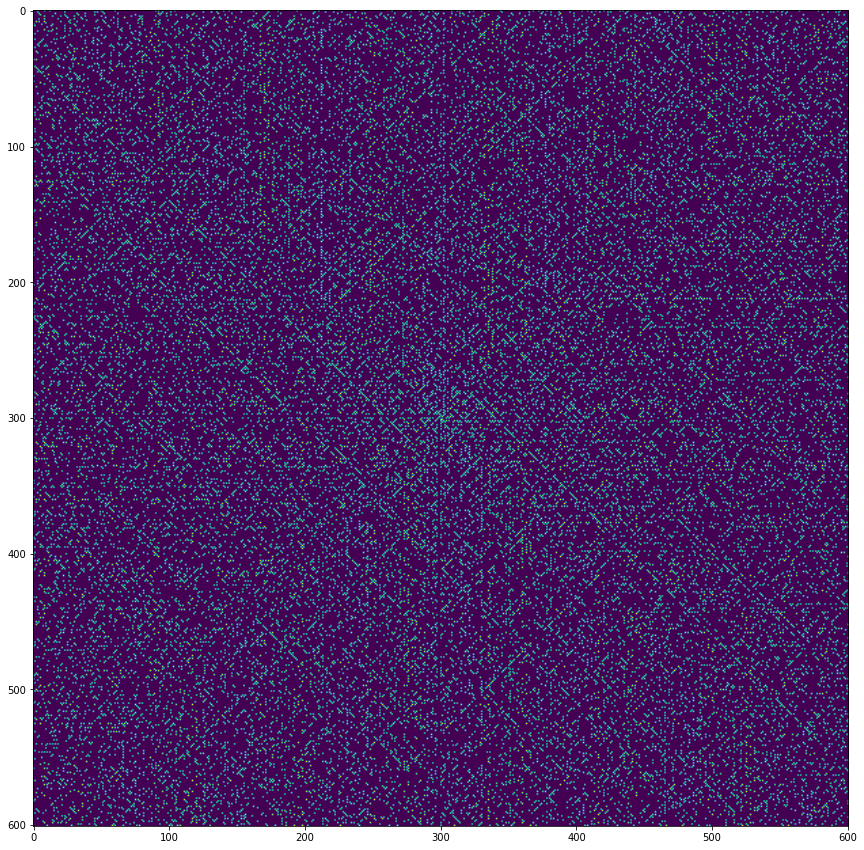

In [79]:
plt.figure(figsize=(15,15))
plt.imshow(M,interpolation='bilinear')
plt.show()